<a href="https://colab.research.google.com/github/hawkeyedatatsai/DBSCAN-and-Agglomerative-Clustering/blob/main/3_DBSCAN_and_Agglomerative_Clustering_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

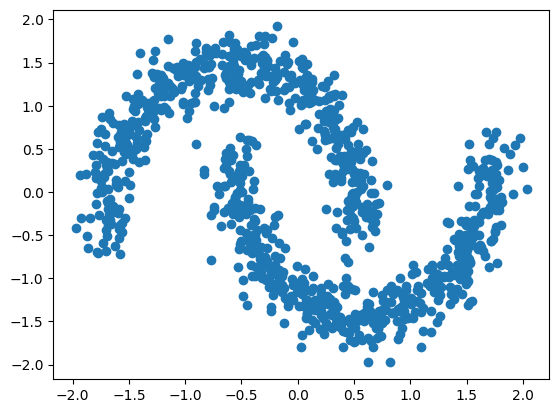

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, AgglomerativeClustering
from sklearn.neighbors import NearestNeighbors
import scipy.cluster.hierarchy as sch
from sklearn.datasets import make_moons
moons = make_moons(n_samples = 1000,
                   noise=.1,
                   random_state=42)[0]

#Instantiate Standard Scaler AND Fit & transform data 
moons=StandardScaler().fit_transform(moons)
plt.scatter(moons[:,0], moons[:,1])

#Cluster the data with DBSCAN


##Baseline

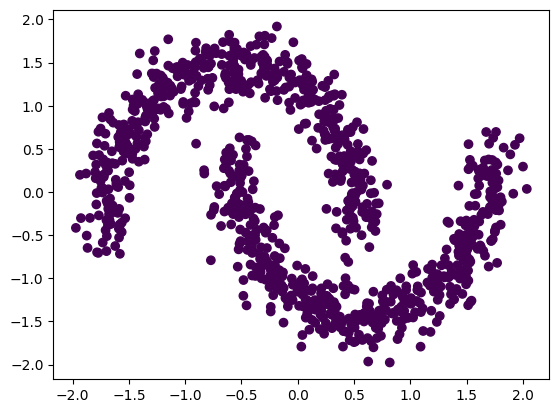

In [7]:
db = DBSCAN()
db.fit(moons)
plt.scatter(moons[:,0], moons[:, 1], c=db.labels_);

##Tuning

In [9]:
min_samples = 30
neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors.fit(moons)
distances, indices = neighbors.kneighbors(moons)
distances[:5]

array([[0.        , 0.02230357, 0.04586937, 0.06560064, 0.06855968,
        0.08072923, 0.11792255, 0.11881996, 0.13556174, 0.14646141,
        0.16881587, 0.18063795, 0.18099338, 0.18134322, 0.18808798,
        0.20264767, 0.22519061, 0.24076442, 0.24383722, 0.24426192,
        0.25985253, 0.2667944 , 0.26684873, 0.27738285, 0.28001431,
        0.28969078, 0.29596423, 0.29633694, 0.3107646 , 0.3189059 ],
       [0.        , 0.03868558, 0.03944988, 0.06026764, 0.07956838,
        0.09749104, 0.11191234, 0.11241943, 0.11526785, 0.11975328,
        0.12218289, 0.13806558, 0.13815371, 0.15491513, 0.16807696,
        0.17064567, 0.17506851, 0.17537287, 0.17547289, 0.17634217,
        0.17653929, 0.18160442, 0.18378407, 0.18914382, 0.19241878,
        0.21141082, 0.21233084, 0.22063801, 0.22119661, 0.22242699],
       [0.        , 0.08763894, 0.09242477, 0.13573307, 0.15577544,
        0.15874166, 0.17391205, 0.18624522, 0.19047833, 0.23801337,
        0.24430668, 0.26363511, 0.27462977, 0.

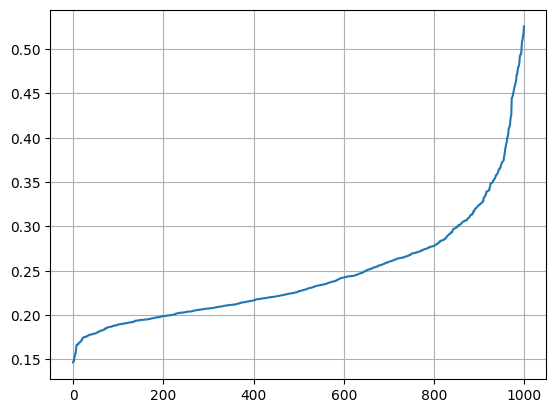

In [11]:
#sort the distances to min samples closest point
sorted_distances = np.sort(distances[:, min_samples-1])
plt.plot(sorted_distances)
plt.grid();

For min_samples = 30, seems like both .28 and 3 could be good epsilon

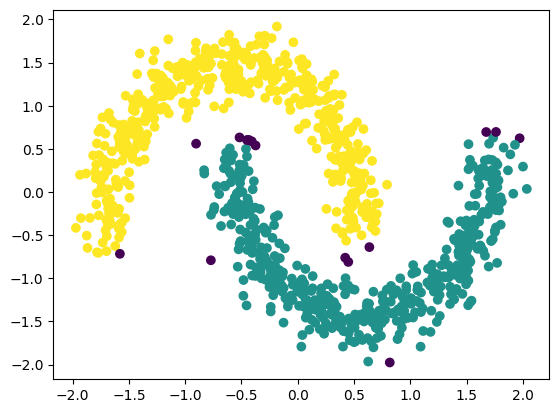

In [12]:
#.28
dbs = DBSCAN(min_samples=min_samples, eps=.28)
dbs.fit(moons)
plt.scatter(moons[:,0], moons[:,1], c=dbs.labels_)

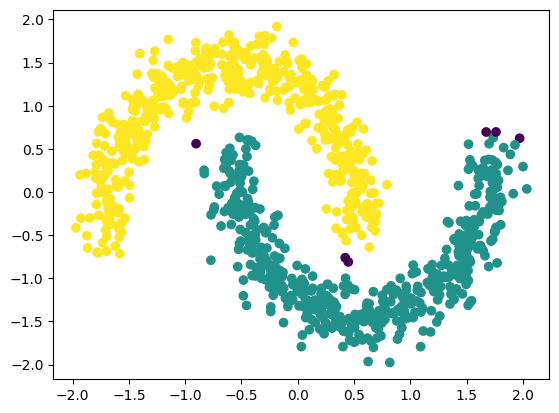

In [13]:
#.3
dbs = DBSCAN(min_samples=min_samples, eps=.3)
dbs.fit(moons)
plt.scatter(moons[:,0], moons[:,1], c=dbs.labels_)

By comparing these two plots, .3 has less noises than .28. But both of them are still not th best clustering options.

#Cluster the data using Agglomerative Clustering


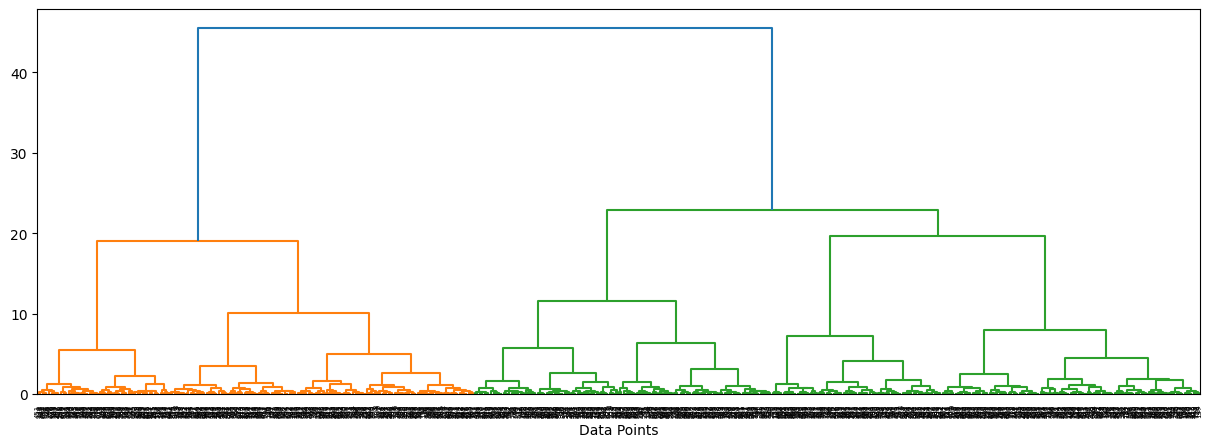

In [14]:
#Visualize Dendogram
plt.figure(figsize = (15, 5))
sch.dendrogram(sch.linkage(moons, method = 'ward'))
plt.xlabel('Data Points');

In the dendrogram above, it is observed that the vertical lines are longest at 2 clusters. This is where the clusters have the greatest average distance from each other.

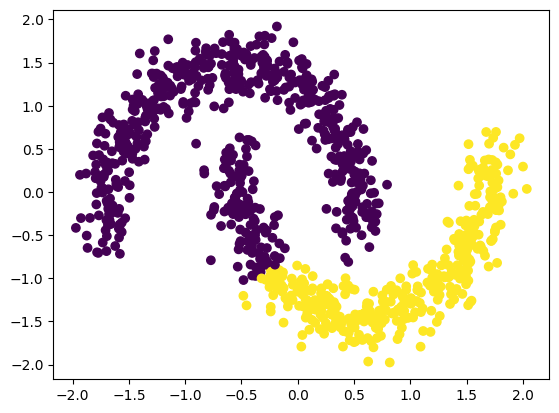

In [15]:
agg = AgglomerativeClustering(n_clusters=2)
agg.fit(moons)

plt.scatter(moons[:,0], moons[:,1], c=agg.labels_);

#Conclusion
- The tuned DBSCAN, with min_samples = 30 AND .3 eps, separates the two moons from each other better despite with limited noises.

- AgglomerativeClustering made tuning very easy and straightforward. However, it seems to have assigned part of the moon to another cluster.  
